<div style="border:solid green 3px; padding: 20px">
																					
<b>Привет!</b>
																					
Меня зовут Сороколетов Илья и я буду проверять твой проект. 
																					
Предлагаю общаться на «**ты**», но если тебе будет комфортнее общаться на «**вы**», то сообщи об этом в комментариях)
																					
																					
Для твоего удобства, я буду выделять свои комментарии следующим образом:
																					
<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> Самые важные замечания. Они указывают на ключевые моменты, которые влияют на конечный результат проекта. </div>
																					
<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> Советы или замечания, которые помогут сделать твою работу лучше, но необязательны к выполнению.
																					
</div>
																					
<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> Так я выделяю все остальные комментарии.</div>
																					
																					
Пометками <b>v1-v2-v3-...</b> я буду отмечать версию проверки. Так ты сможешь быстро найти мои новые комментарии.
																					
Давай работать над проектом в диалоге: если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения, например вот так:
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
</div>
																					
<b>Пожалуйста, не перемещай, не изменяй и не удаляй мои комментарии.</b> Если ты оставляешь свои комментарии, то делай это под моими, чтобы сообщения были расположены в хронологическом порядке. Всё это поможет выполнить повторную проверку твоего проекта быстрее. 
																					
Перед отправкой работы я рекомендую нажимать Kernel -> Restart & Run All. Это перезапустит ядро и по очереди выполнит все ячейки. Так ты сможешь проверить, что всё работает корректно. Кнопка Kernel находится в панели сверху
																					
Обязательно задавай вопросы если они возникнут, а я перехожу к проверке)
																					
P.S. На всякий случай, я оставлю пустой шаблон для твоих комментариев ниже. Кликни два раза на мой комментарий, скопируй последние четыре строчки кода и вставляй их в пустую ячейку там, где ты хочешь оставить комментарий. Не забудь только перед этим сменить тип ячейки на Markdown. Быстро это можно сделать так: кликнуть на ячейку - нажать ESC - нажать M. 
																					    
																					    
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Удали этот текст и вместо него напиши свой комментарий 🙂
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Важно оставлять перед проектом краткое описание задачи. Это поможет тебе быстро вспомнить о чем проект, если спустя время ты решишь к нему вернуться)
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Добавил краткое описание ниже.
</div>

### Описание проекта
Проект по анализу данных популярного сервиса аренды самокатов GoFast. Данные содержат информацию о некоторых пользователях из нескольких городов, а также об их поездках. Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением. Сервисом можно пользоваться как с подпиской, так и без неё.

Нужно провести анализ данных и проверить ряд гипотез, которые могут помочь бизнесу вырасти.


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Обе правки выполнены 👍
</div>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import binom, norm
from matplotlib import pyplot as plt

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Молодец, что импортируешь все библиотеки отдельно в первой ячейке. Это позволит тебе в любой момент добавить ещё одну библиотеку без перезаписи переменных.
</div>

In [2]:
# Настройки
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', '{:.2f}'.format)

#### Шаг 1. Загрузка данных

In [3]:
try:
    # Практикум
    users_original_df = pd.read_csv('/datasets/users_go.csv')
    rides_original_df = pd.read_csv('/datasets/rides_go.csv')
    subs_original_df = pd.read_csv('/datasets/subscriptions_go.csv')
    display('Датасеты из Практикума загружены.')
except:
    # Локальный проект
    users_original_df = pd.read_csv('datasets/users_go.csv')
    rides_original_df = pd.read_csv('datasets/rides_go.csv')
    subs_original_df = pd.read_csv('datasets/subscriptions_go.csv')
    display('Локальные датасеты загружены.')

'Датасеты из Практикума загружены.'

**Users:**
* user_id	- уникальный идентификатор пользователя
* name - имя пользователя
* age - возраст
* city - город
* subscription_type - тип подписки (free, ultra)

In [4]:
users_original_df.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


In [5]:
users_original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


**Rides:**
* user_id - уникальный идентификатор пользователя
* distance - расстояние, которое пользователь проехал в текущей сессии (в метрах)
* duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»
* date - дата совершения поездки

In [6]:
rides_original_df.head()

,user_id,distance,duration,date
0,1,4409.92,25.60,2021-01-01
1,1,2617.59,15.82,2021-01-18
2,1,754.16,6.23,2021-04-20
3,1,2694.78,18.51,2021-08-11
4,1,4028.69,26.27,2021-08-28


In [7]:
rides_original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


**Subscriptions:**
* subscription_type - тип подписки
* minute_price - стоимость одной минуты поездки по данной подписке
* start_ride_price - стоимость начала поездки
* subscription_fee - стоимость ежемесячного платежа

In [8]:
subs_original_df.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [9]:
subs_original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


**Выводы по предварительному изучению данных:**
* Во всех датасетах отсутствуют пропуски.
* Все типы, кроме date определились корректно.
* Названия столбцов в порядке.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Первичный анализ данных выполнен верно. Можем переходить к следующему этапу)
</div>

#### Шаг 2. Предобработка данных

In [10]:
# Делаем копии рабочих датасетов.
users_df = users_original_df.copy()
rides_df = rides_original_df.copy()
subs_df = subs_original_df.copy()

In [11]:
# Смотрим на прямые дубликаты.
display('Дубликатов в users: ' + str(users_df.duplicated().sum()))
display('Дубликатов в rides: ' + str(rides_df.duplicated().sum()))

'Дубликатов в users: 31'

'Дубликатов в rides: 0'

In [12]:
# Убираем дубликаты в users, эти данные не несут никакой смысловой нагрузки.
display(users_df.shape)
users_df.drop_duplicates(inplace=True)
display(users_df.shape)

(1565, 5)

(1534, 5)

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Проверка на дубликаты выполнена!
</div>

In [13]:
# Преобразуем date в rides в datetime.
display(rides_df['date'].head())
rides_df['date'] = pd.to_datetime(rides_df['date'], format='%Y-%m-%d')
display(rides_df['date'].head())

0    2021-01-01
1    2021-01-18
2    2021-04-20
3    2021-08-11
4    2021-08-28
Name: date, dtype: object

0   2021-01-01
1   2021-01-18
2   2021-04-20
3   2021-08-11
4   2021-08-28
Name: date, dtype: datetime64[ns]

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Тип данных изменён верно! 
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Если при загрузке данных добавить параметр parse_dates: parse_dates=['date'] то список столбцов автоматически переведется в даты. Подробнее про это можно прочитать по ссылке ниже

	https://newtechaudit.ru/gruzi-daty-krasivo/
</div>

In [14]:
# Создадим дополнительй столбец в rides с указанием месяца поездки.
rides_df['month'] = rides_df['date'].dt.month
rides_df[['date', 'month']].head()

,date,month
0,2021-01-01,1
1,2021-01-18,1
2,2021-04-20,4
3,2021-08-11,8
4,2021-08-28,8


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>Новый столбец создан верно!
</div>

Поищем непрямые дубликаты в данных.

In [15]:
users_df['city'].unique()  # С городами всё хорошо.

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

In [16]:
users_df['user_id'].duplicated().sum()  # Дублей в id пользователей нет.

0

In [17]:
users_df['age'].describe()  # С возрастом всё хорошо. Пассажиры от 12 до 43 лет.

count   1534.00
mean      24.90
std        4.57
min       12.00
25%       22.00
50%       25.00
75%       28.00
max       43.00
Name: age, dtype: float64

In [18]:
users_df['subscription_type'].value_counts()  # Всё хорошо.

free     835
ultra    699
Name: subscription_type, dtype: int64

**Выводы по предобработке данных:**
* Удалены дубли по пользователям в количестве 31 штука.
* Преобразован тип в столбце date на datetime и добавили столбце с указанем месяца поездки.
* В остальном данные особой предобработки не требуют.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b> 
<br>С предобработкой закончили. Переходим к исследовательскому анализу!
</div>

#### Шаг 3. Исследовательский анализ данных

In [19]:
# Изучим города, в которых пользователи используют сервис.
users_df['city'].value_counts()

Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

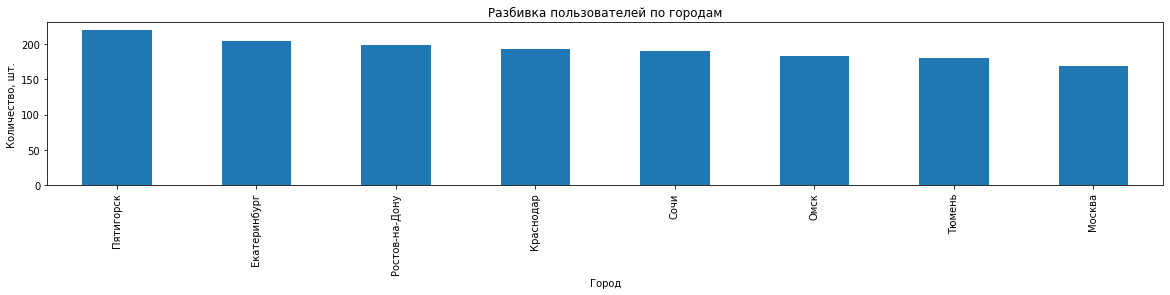

In [20]:
fig, ax = plt.subplots()
ax.set_title('Разбивка пользователей по городам')
ax.set_xlabel('Город')
ax.set_ylabel('Количество, шт.')
users_df['city'].value_counts().plot.bar(figsize=(20, 3))
plt.show()

**Города:**
* Больше всего в исследуемой выборке пользователей из Пятигорска. Меньше всего из Москвы.
* Каждый город представлен более-менее равномерно, вне зависимости от размеров.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>По заданию тут нужно ещё добавить визуализацию
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Добавил barplot выше. Оси, тайтл подписал.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Обе правки выполнены 👍
</div>

In [21]:
# Подписки.
display(users_df['subscription_type'].value_counts())
users_df.groupby(['city', 'subscription_type'])['subscription_type'].count()

free     835
ultra    699
Name: subscription_type, dtype: int64

city            subscription_type
Екатеринбург    free                 112
                ultra                 92
Краснодар       free                 112
                ultra                 81
Москва          free                  84
                ultra                 84
Омск            free                  92
                ultra                 91
Пятигорск       free                 125
                ultra                 94
Ростов-на-Дону  free                 109
                ultra                 89
Сочи            free                 103
                ultra                 86
Тюмень          free                  98
                ultra                 82
Name: subscription_type, dtype: int64

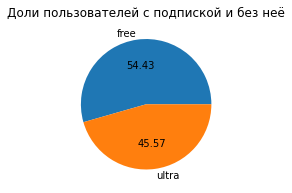

In [22]:
fig, ax = plt.subplots()
ax.set_title('Доли пользователей с подпиской и без неё')
users_df['subscription_type'].value_counts().plot.pie(figsize=(20, 3), autopct='%.2f')
ax.set_ylabel(None)
plt.show()

**Подписки:**
* В выборке представлены в большом количестве как пользователи с подпиской, так и без по каждому из городов.
* Пользователей с подпиской немного меньше бесплатных пользователей.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Нет визуализации. Для этого хорошо пойдет круговая диаграмма
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Добавил пай выше.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Обе правки выполнены 👍
</div>

In [23]:
# Возраст пользователей.
users_df['age'].describe()

count   1534.00
mean      24.90
std        4.57
min       12.00
25%       22.00
50%       25.00
75%       28.00
max       43.00
Name: age, dtype: float64

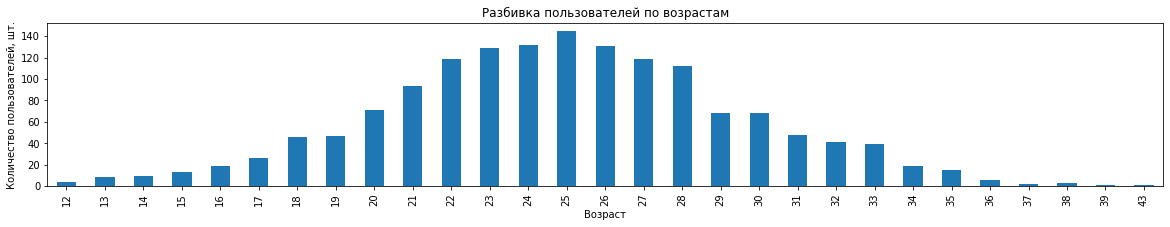

In [24]:
fig, ax = plt.subplots()
ax.set_title('Разбивка пользователей по возрастам')
ax.set_xlabel('Возраст')
ax.set_ylabel('Количество пользователей, шт.')
users_df['age'].value_counts().sort_index().plot.bar(figsize=(20, 3))
plt.show()

**Возраст:**
* В выборке представлены пользователи от 12 до 43 лет.
* Средний/медианный возраст пользователей ~25 лет.

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Нет визуализации. 
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Добавил выше барплот, оси, тайтл прописал.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Обе правки выполнены 👍
</div>

In [25]:
# Продолжительность и дальность поездок.
rides_df[['distance', 'duration']].describe().T

,count,mean,std,min,25%,50%,75%,max
distance,18068.00,3070.66,1116.83,0.86,2543.23,3133.61,3776.22,7211.01
duration,18068.00,17.81,6.09,0.50,13.60,17.68,21.72,40.82


<AxesSubplot:title={'center':'Распределение поездок по дальности'}, xlabel='Дальность, м', ylabel='Количество поездок, шт.'>

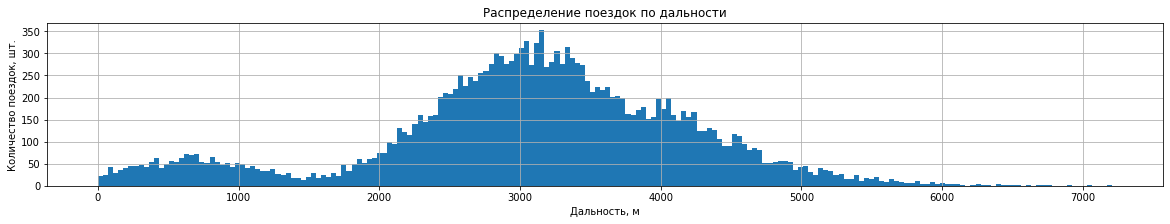

In [26]:
# Визуальный осмотр дальности.
fig, ax = plt.subplots()
ax.set_title('Распределение поездок по дальности')
ax.set_xlabel('Дальность, м')
ax.set_ylabel('Количество поездок, шт.')
rides_df['distance'].hist(bins=200, figsize=(20, 3), ax=ax)

<AxesSubplot:title={'center':'Распределение поездок по длительности'}, xlabel='Длительность, мин.', ylabel='Количество поездок, шт.'>

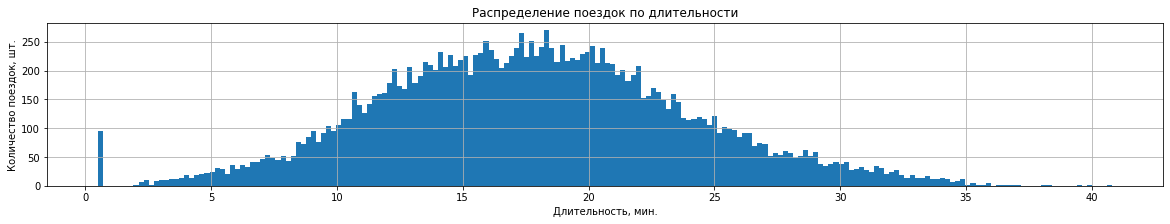

In [27]:
# Визуальный осмотр длительности.
fig, ax = plt.subplots()
ax.set_title('Распределение поездок по длительности')
ax.set_xlabel('Длительность, мин.')
ax.set_ylabel('Количество поездок, шт.')
rides_df['duration'].hist(bins=200, figsize=(20, 3), ax=ax)

'Количество поездок до 100 метров: 78'

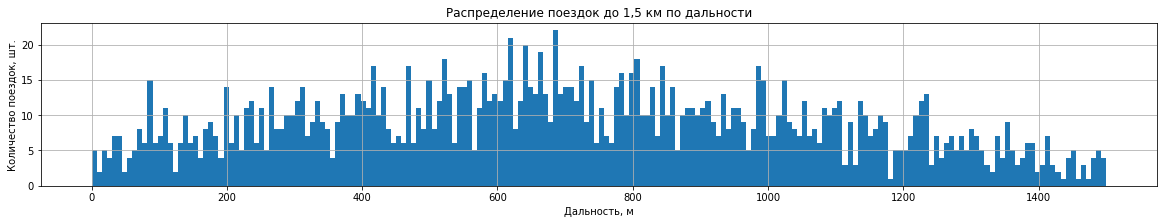

In [28]:
# Поездки до 1,5 км.
fig, ax = plt.subplots()
ax.set_title('Распределение поездок до 1,5 км по дальности')
ax.set_xlabel('Дальность, м')
ax.set_ylabel('Количество поездок, шт.')
rides_df['distance'].hist(ax=ax, bins=200, figsize=(20, 3), range=(0, 1500))
"Количество поездок до 100 метров: " + str(rides_df.query('distance < 100').shape[0])

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Графики должны быть наглядным без контекста (т.к. в реальной практике ты будешь показывать презентацию или отчет заказчику). Необходимо проследить чтобы всегда был заголовок и подписаны оси. Этот комментарий относится ко всем графикам во всем проекте
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Заголовки и оси подписал на всех графиках.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Обе правки выполнены 👍
</div>

**Дальность поездки:**
* Средняя дальность поездки составляет около 3,1 км. Максимальная - 7,2 км. Вполне реалистично.
* Распределение поездок по дальности имеет 2 ярко-выраженных пика. Один в районе 0,8 км (короткие поездки), другой в районе 3,1 км (нормальные поездки).
* Часть поездок - ультракороткие. 78 поездок до 100 метров. Вероятно - это случаи когда новые пользователи только знакомились с возможностями самокатов.

'Количество поездок продолжительностью до 1 минуты: 95'

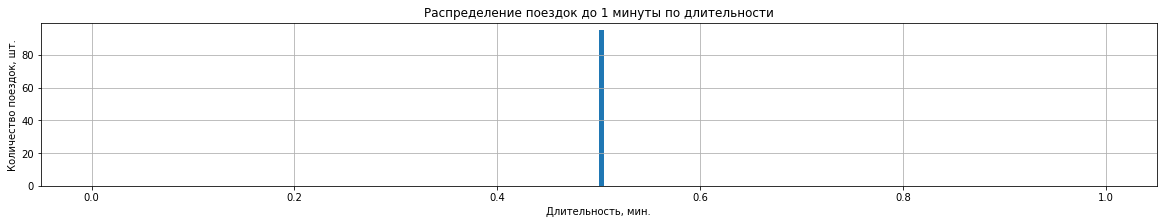

In [29]:
# Поездки до 1 минуты.
fig, ax = plt.subplots()
ax.set_title('Распределение поездок до 1 минуты по длительности')
ax.set_xlabel('Длительность, мин.')
ax.set_ylabel('Количество поездок, шт.')
rides_df['duration'].hist(bins=200, figsize=(20, 3), range=(0, 1), ax=ax)
'Количество поездок продолжительностью до 1 минуты: ' + str(rides_df.query('duration < 1').shape[0])

In [30]:
# Посмотрим на поездки до 1 минуты.
rides_df.query('duration < 1').describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,95.00,1092.21,244.03,701.00,901.00,1069.00,1310.50,1524.00
distance,95.00,5113.18,658.25,4030.31,4611.51,5052.77,5488.46,7211.01
duration,95.00,0.50,0.00,0.50,0.50,0.50,0.50,0.50
month,95.00,6.48,3.71,1.00,3.00,6.00,10.00,12.00


95

,user_id,distance,duration,date,month
6531,701,4196.45,NaN,2021-08-31,8
6570,704,4830.82,NaN,2021-10-14,10
6680,712,4684.00,NaN,2021-03-04,3
6695,713,5215.64,NaN,2021-02-25,2
6768,718,5197.44,NaN,2021-02-11,2


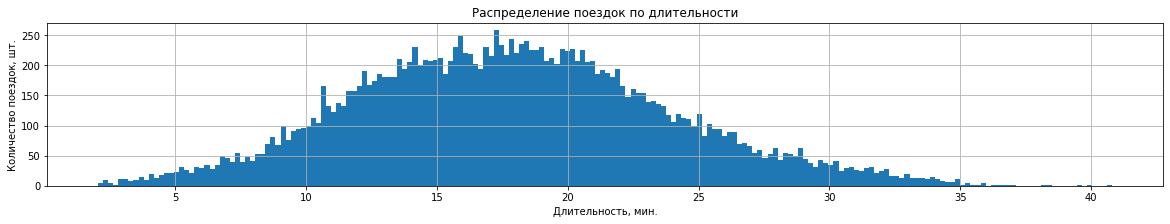

In [31]:
# Заменим поездки длительностью 0,5 минуты пропусками.
rides_df.loc[rides_df['duration'] < 1, ['duration']] = float('nan')
display(rides_df['duration'].isna().sum())

# Взглянем на распределение еще раз.
fig, ax = plt.subplots()
ax.set_title('Распределение поездок по длительности')
ax.set_xlabel('Длительность, мин.')
ax.set_ylabel('Количество поездок, шт.')
rides_df['duration'].hist(bins=200, figsize=(20, 3), ax=ax)

rides_df[rides_df['duration'].isna()].head()

**Продоложительность поездки:**
* Средняя продолжительность поездки на самокате около 18 минут. Самая долгая поезда - 41 минута.
* В данных есть 95 поездок длительностью ровно полминуты и с дистанцией от 4 до 7 км. Это явно ошибочные данные. Ввиду того, что 95 поездок может составлять до половины поездок по конкретному городу, а пока понять разбивку этих поездок по городам мы понять не можем - была сделана замена длительностей этих поездок на na. **Необходимо провести коммуникации с предоствившими данные сотрудниками.**

#### Шаг 4. Объединение данных

In [32]:
# На основе rides собираем данные в один датафрейм.
df = rides_df.merge(users_df, how='left', on='user_id').merge(subs_df, how='left', on='subscription_type')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           17973 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Таблицы объединены верно
</div>

In [33]:
free_df = df.query('subscription_type == "free"')
ultra_df = df.query('subscription_type == "ultra"')

In [34]:
# Проверки
display('Начальное количество строк: ' + str(rides_df.shape[0]))
display('Итоговое количество строк: ' + str(df.shape[0]))
display('Разделение на датафреймы прошло верно: ' + str(df.shape[0] == free_df.shape[0] + ultra_df.shape[0]))

'Начальное количество строк: 18068'

'Итоговое количество строк: 18068'

'Разделение на датафреймы прошло верно: True'

In [35]:
# Анализ расстояний и времени поездок по free
free_df[['distance', 'duration']].describe().T

,count,mean,std,min,25%,50%,75%,max
distance,11568.00,3045.50,1246.17,0.86,2366.56,3114.65,3905.70,7211.01
duration,11473.00,17.53,6.16,2.04,13.09,17.38,21.64,34.95


In [36]:
# Анализ расстояний и времени поездок по ultra
ultra_df[['distance', 'duration']].describe().T

,count,mean,std,min,25%,50%,75%,max
distance,6500.00,3115.45,836.90,244.21,2785.44,3148.64,3560.57,5699.77
duration,6500.00,18.54,5.57,3.76,14.52,18.18,21.88,40.82


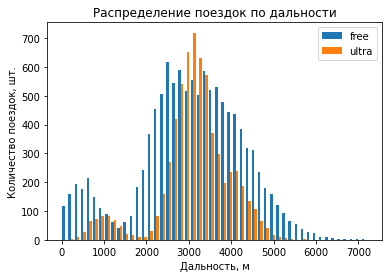

In [37]:
# Сравним распределения по дальности для free и ultra.
fig, ax = plt.subplots()
ax.set_title('Распределение поездок по дальности')
ax.set_xlabel('Дальность, м')
ax.set_ylabel('Количество поездок, шт.')
plt.hist([free_df['distance'], ultra_df['distance']], bins = 50, label=['free', 'ultra'])
plt.legend()
plt.show()

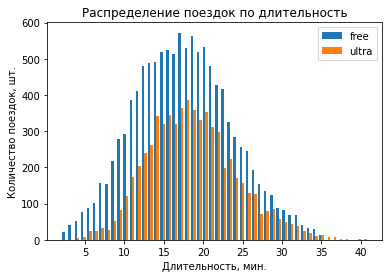

In [38]:
# Сравним распределения по длительности для free и ultra.
fig, ax = plt.subplots()
ax.set_title('Распределение поездок по длительность')
ax.set_xlabel('Длительность, мин.')
ax.set_ylabel('Количество поездок, шт.')
plt.hist([free_df['duration'], ultra_df['duration']], bins = 50, label=['free', 'ultra'])
plt.legend()
plt.show()

**Выводы по dsitance и duration в зависимости от статуса пользователей:**
* Премиум пользователи совершают меньше коротких (до километра) поездок. При этом чаще прочих совершают поездки дальностью около 4км (пока не ясно в связи с чем).
* Дисперсия по расстоянию поездки у премиум пользователей меньше.
* В среднем дальность поездки у пользователей с разным статусом примерно одинакова.
* Средняя продолжительность поездки у премиум-пользователей не сильно отличается от пользователей с бесплатным тарифом.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Вывод верный!
</div>

<div class="alert alert-warning">
<b>⚠️ Комментарий ревьюера v1:</b> 
<br>Здесь можно было бы наложить графики распределений друг на друга, чтобы их было проще сравнить друг с другом
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Сделал.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Красота!
</div>

#### Шаг 5. Подсчёт выручки

In [39]:
# Создаём таблицу с группировкой по юзерам и месяцам, подтягиваем subs_type и делаем расчёт для времени оплаты.
agg_by_user_and_month_df = df.groupby(['user_id', 'subscription_type', 'month']).agg(
    {'distance': ['sum', 'count'], 'duration': ['sum', lambda x: np.ceil(x).sum()]})
# Заменяем комплексный индекс на обычный и обновляем названия столбцов.
agg_by_user_and_month_df.reset_index(drop=False, inplace=True)
agg_by_user_and_month_df.columns = ['user_id', 'subscription_type', 'month', 'distance_sum', 'rides_count',
                                    'duration_sum', 'duration_ceiled_sum']
agg_by_user_and_month_df.head()

,user_id,subscription_type,month,distance_sum,rides_count,duration_sum,duration_ceiled_sum
0,1,ultra,1,7027.51,2,41.42,42.00
1,1,ultra,4,754.16,1,6.23,7.00
2,1,ultra,8,6723.47,2,44.78,46.00
3,1,ultra,10,5809.91,2,31.58,32.00
4,1,ultra,11,7003.50,3,53.40,56.00


In [40]:
# Сохраняем тариф в переменные
minute_price_free = subs_original_df[subs_original_df['subscription_type'] == 'free']['minute_price'][0]
minute_price_ultra = subs_original_df[subs_original_df['subscription_type'] == 'ultra']['minute_price'][1]
start_ride_price_free = subs_original_df[subs_original_df['subscription_type'] == 'free']['start_ride_price'][0]
start_ride_price_ultra = subs_original_df[subs_original_df['subscription_type'] == 'ultra']['start_ride_price'][1]
subs_fee_free = subs_original_df[subs_original_df['subscription_type'] == 'free']['subscription_fee'][0]
subs_fee_ultra = subs_original_df[subs_original_df['subscription_type'] == 'ultra']['subscription_fee'][1]


# Проверка
# display(minute_price_free)
# display(minute_price_ultra)
# display(start_ride_price_free)
# display(start_ride_price_ultra)
# display(subs_fee_free)
# display(subs_fee_ultra)

# Пишем функцию для расчёта выручки.
def revenue_calculator(s):
    if s['subscription_type'] == 'free':
        return subs_fee_free + s['duration_ceiled_sum'] * minute_price_free + s['rides_count'] * start_ride_price_free
    else:
        return subs_fee_ultra + s['duration_ceiled_sum'] * minute_price_ultra + s[
            'rides_count'] * start_ride_price_ultra

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Молодец, что создаешь функцию для расчета выручки
</div>

In [41]:
# Применяем функцию для расчёта выручки
agg_by_user_and_month_df['revenue'] = agg_by_user_and_month_df.apply(revenue_calculator, axis='columns')

# Проверка
# display(agg_by_user_and_month_df.query('subscription_type == "ultra"'))
# display(agg_by_user_and_month_df.query('subscription_type == "free"'))

agg_by_user_and_month_df.groupby('subscription_type')['revenue'].mean()

subscription_type
free    328.53
ultra   362.79
Name: revenue, dtype: float64

**Выводы:**
* Произведен расчёт выручки помесячно для каждого пользователя.
* Премиальные пользователи в среднем в месяц приносят больше выручи, чем бесплатные.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Выручка расчитана верно!
</div>

#### Шаг 6. Проверка гипотез

**Н0:** Пользователи с подпиской тратят столько же времени на поездки, сколько и пользователи без подписки.
**Н1:** Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Гипотезы сформулированы верно
</div>

In [42]:
alpha = 0.01
result = st.ttest_ind(ultra_df['duration'].dropna(), free_df['duration'].dropna(), alternative='greater')
display('Pvalue:' + str(result.pvalue))
if result.pvalue > alpha:
    display('Нет оснований отвергать нулевую гипотезу.')
else:
    display('Отвергаем нулевую гипотезу.')

'Pvalue:4.704468074453899e-28'

'Отвергаем нулевую гипотезу.'

**Вывод:**
* Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Вывод верный
</div>

**Н0:** Среднее расстояние, которое за одну поездку проезжают пользователи с подпиской равно 3130 метров.
**Н1:** Среднее расстояние, которое за одну поездку проезжают пользователи с подпиской более 3130 метров.

In [43]:
alpha = 0.01
mean_dist = 3130
result = st.ttest_1samp(ultra_df['distance'].dropna(), mean_dist, alternative='greater')
display('Pvalue:' + str(result.pvalue))
if result.pvalue > alpha:
    display('Нет оснований отвергать нулевую гипотезу.')
else:
    display('Отвергаем нулевую гипотезу.')

'Pvalue:0.9195368847849785'

'Нет оснований отвергать нулевую гипотезу.'

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>В данном случае нужно использовать параметр alternative = 'greater'. Поскольку оптимальное расстояние по износу составляет 3130 м, значит большее расстояние приводит к повышенному износу самоката. Следовательно, имеет смысл сформулировать альтернативную гипотезу "Подписчики в среднем проезжают расстояние больше оптимального"
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Поправил.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Обе правки выполнены 👍
</div>

**Вывод:**
* Нет оснований полагать, что среднее расстояние, которое за одну поездку проезжают пользователи с подпиской больше 3130 метров.

**Н0:** Средняя помесячная выручка от пользователей с подпиской равна средней помесячной выручке от пользователей без подписки.
**Н1:** Средняя помесячная выручка от пользователей с подпиской больше средней помесячной выручке от пользователей без подписки.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Гипотезы сформулированы верно
</div>

In [44]:
alpha = 0.01
result = st.ttest_ind(
    agg_by_user_and_month_df[agg_by_user_and_month_df['subscription_type'] == 'ultra']['revenue'].dropna(),
    agg_by_user_and_month_df[agg_by_user_and_month_df['subscription_type'] == 'free']['revenue'].dropna(),
    alternative='greater')
display('Pvalue:' + str(result.pvalue))
if result.pvalue > alpha:
    display('Нет оснований отвергать нулевую гипотезу.')
else:
    display('Отвергаем нулевую гипотезу.')

'Pvalue:1.234097181482016e-31'

'Отвергаем нулевую гипотезу.'

**Выводы:**
* Средняя помесячная выручка от пользователей с подпиской больше средней помесячной выручки от пользователей без подписки.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Вывод верный
</div>

**Проверка гипотезы о снижении обращений в техподдержку:**
* Для проверки такой гипотезы потребуется проверка гипотезы равенства среднего по парным выборкам.
* Необходимо будет использовать тест scipy.stats.ttest_rel(before, after).

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Метод выбран верно!
</div>

#### Шаг 7. Распределения

**Задача:**
Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж. Эта акция уже проводилась ранее и по итогу выяснилось, что после бесплатного пробного периода подписку продлевают 10% пользователей.

Выясните, какое минимальное количество промокодов нужно разослать, чтобы вероятность не выполнить план была примерно 5%. Подберите параметры распределения, описывающего эту ситуацию, постройте график распределения и сформулируйте ответ на вопрос о количестве промокодов.

'Вероятность получить меньше 100 дополнительных подписчиков при раздаче 1172 промокодов составляет: 4.95%'

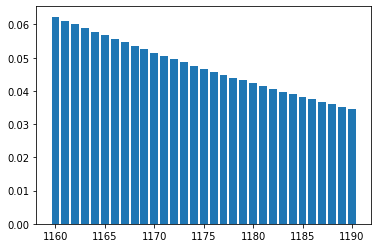

In [45]:
# Необходимо построить биномиальное распределение.
p = 0.1
new_clients_required = 100
# Диапазон для графика.
n_min= 1160
n_max = 1190
p_plan = 0.05

dots = []

# Строим график вароятности получить меньше 100 клиентов.
for i in range(n_min, n_max + 1):
    dots.append(binom.cdf(new_clients_required, i, p))

plt.bar(range(n_min, n_max + 1), dots)

# Определяем на глаз значение под p_plan.
display(f'Вероятность получить меньше 100 дополнительных подписчиков при раздаче 1172 промокодов составляет: {binom.cdf(new_clients_required, 1172, p):.2%}')

**Вывод:** Для получения минимум 100 новых подписчиков с вероятностью более 95% необходимо раздать минимум 1172 промокода.

**Задача:**
Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40% получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

In [46]:
# Параметры биномиального распределения
p = 0.4
n = 10 ** 6
mu = n * p
sigma = (n * p * (1 - p)) ** 0.5

# Проверим диапазон mu +- 3 *sigma.
display('Можно аппроксимировать нормальным распределением?', (mu - 3 * sigma > 0), (mu + 3 * sigma < n))

distr = norm(mu, sigma)

new_clients_required = 399_500
new_clients_required_for_norm = (399_500 - mu) / sigma

display(f'Вероятность получить менее 399,5 тыс. открытых уведомлений: {norm.cdf(new_clients_required_for_norm):.2%}')

'Можно аппроксимировать нормальным распределением?'

True

True

'Вероятность получить менее 399,5 тыс. открытых уведомлений: 15.37%'

**Вывод:** Вероятность получить менее 399,5 тыс. открытых уведомлений составляет 15,37%.

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v1:</b>
<br>Дополнительное задание выполнено верно!
</div>

<div class="alert alert-danger">
<b>❌ Комментарий ревьюера v1:</b> 
<br>Обязательно нужно написать общий вывод после проделанной работы. Хорошей практикой является написание в общем выводе всех твоих действий (кратко) по проекту. А после этого нужно написать общий вывод использую информацию из промежуточных выводов после каждого раздела. В нашем исследовании основной вопрос это "Являются ли подписчики более выгодными для компании?"  Не забудь ответить на него
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Добавил ниже.
</div>

<div class="alert alert-success">
<b>✔️ Комментарий ревьюера v2:</b>
<br>Обе правки выполнены 👍 Не забывай про это в следующих проектах)
</div>

### Выводы по проекту
* Во время работы проведена обработка и анализ предоставленных сервисом данных.
* Выявлен предположительно ряд ошибочных данных по продолжительности поездки в размере 95 семлов. Команде сервиса рекомендуется выяснить по какой причине появились странные значения длительности поездок ровно 0.5 минуты.
* Выборка довольно равномерно распределена по 8 городам, пользователям с подпиской и без. Средний возраст пользователей составляет около 25 лет. Среди поездок можно выделить 2 группы: короткие (до 1,5 км) и дальние (до 7,5 км). Средняя поездка составляет около 18 минут.
* Средняя продолжительность и дальность поездок пользователей с премиальным аккаунтом и непремиальным отличаются несильно.
* Расчёт помесячной выручки для пользователей показал, что премиальные пользователи в среднем в месяц приносят больше выручи, чем бесплатные.
* Проверка гипотез привела к следующим выводам:
    * Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.
    * Нет оснований полагать, что среднее расстояние, которое за одну поездку проезжают пользователи с подпиской больше 3130 метров.
    * Средняя помесячная выручка от пользователей с подпиской больше средней помесячной выручки от пользователей без подписки.
* **Таким образом статистически обоснован вывод о том, то премиальные подписчики являются более выгодными клиентами для компании, чем беслатные подписчики.**
* В завершающей части работы проведено изучение 2 биномиальных распределений в рамках которых решены 2 абстрактные задачи.

<div class="alert alert-danger">
<b>❌ Итоговый комментарий ревьюера v1:</b> 
<br>Необходимо поправить:
<br>- добавить описание задачи в начале проекта
<br>- добавить графики в шаге 3
<br>- проверить наличие подписей у каждого графика
<br>- корректно проверить вторую гипотезу
<br>- написать общий вывод

<br>После всех внесённых правок не забудь поправить выводы там, где это необходимо
</div>

<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
Кажется, что всё сделал.
</div>

<div class="alert alert-success">
<b>✔️ Итоговый комментарий ревьюера v2:</b>
<br>Все правки выполнены. Молодец!
<br>Я рад был поработать над проверкой твоей работы) В качестве дополнительного материала для изучения могу порекомендовать следующие материалы:

    Курс "Вероятность и статистика" | Глеб Михайлов (free): https://www.youtube.com/playlist?list=PLQJ7ptkRY-xbHLLI66KdscKp_FJt0FsIi

    Методы обнаружения выбросов: https://youtu.be/TOK7Kq7x0yc

<br>Поздравляю со сдачей проекта и желаю удачи в дальнейшем обучении! 😉    
</div>